In [332]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [333]:
df = pd.read_csv('D:/PROJECTS/AIRLIFT/Data Analyst -- Case Study -- Data.csv')
df = df[df['warehouse'] == 'EW2'].drop('warehouse', axis=1)
df.head()

,date,total_orders
90,2021-09-15,186
91,2021-09-16,199
92,2021-09-17,326
93,2021-09-18,390
94,2021-09-19,353


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 90 to 144
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          55 non-null     object
 1   total_orders  55 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [335]:
df['date'] = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 90 to 144
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          55 non-null     datetime64[ns]
 1   total_orders  55 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 KB


In [336]:
df.set_index('date', inplace=True)
df

,total_orders
date,
2021-09-15,186
2021-09-16,199
2021-09-17,326
2021-09-18,390
2021-09-19,353
2021-09-20,359
2021-09-21,393
2021-09-22,395
2021-09-23,295


<AxesSubplot:xlabel='date'>

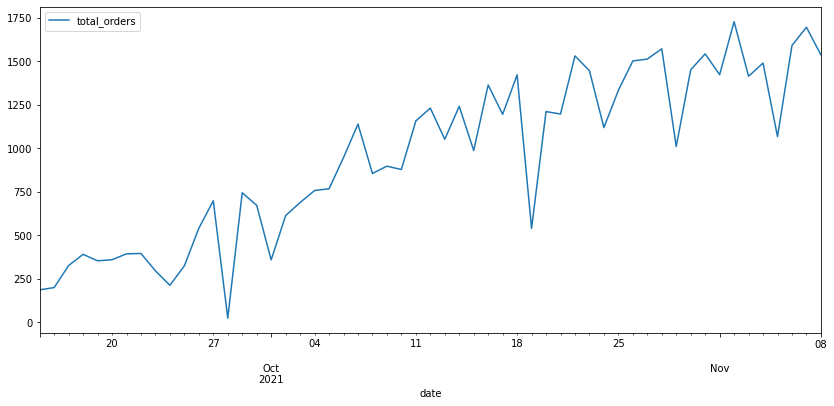

In [337]:
df.plot()

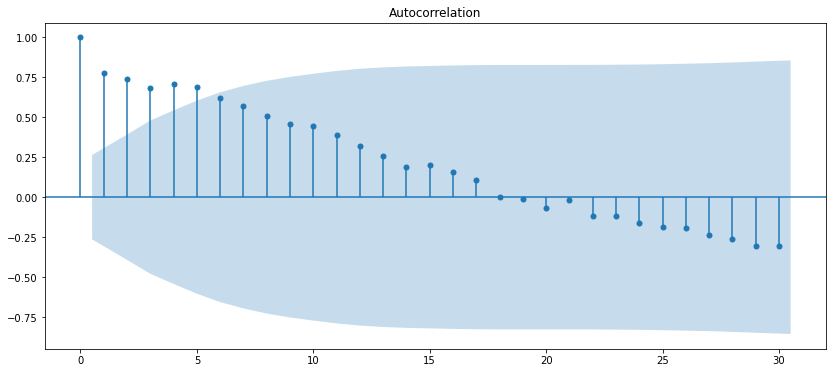

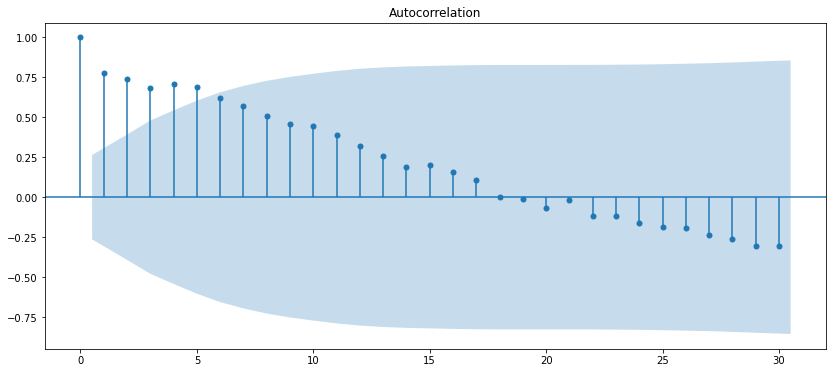

In [338]:
plot_acf(df.total_orders, lags=30)

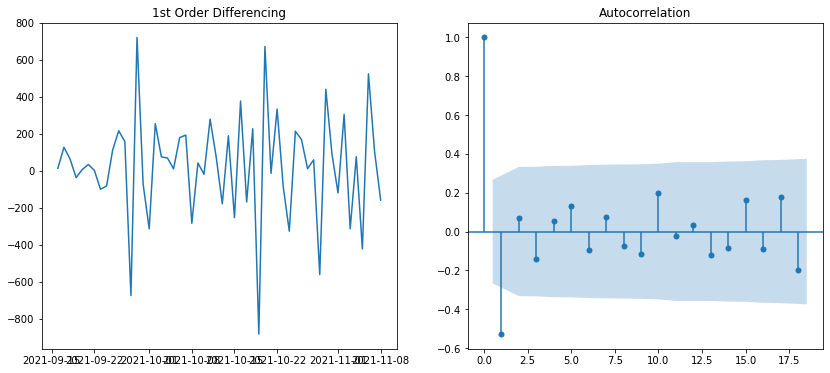

In [339]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.total_orders.diff())

ax2 = f.add_subplot(122)
plot_acf(df.total_orders.diff().dropna(), ax=ax2)
plt.show()

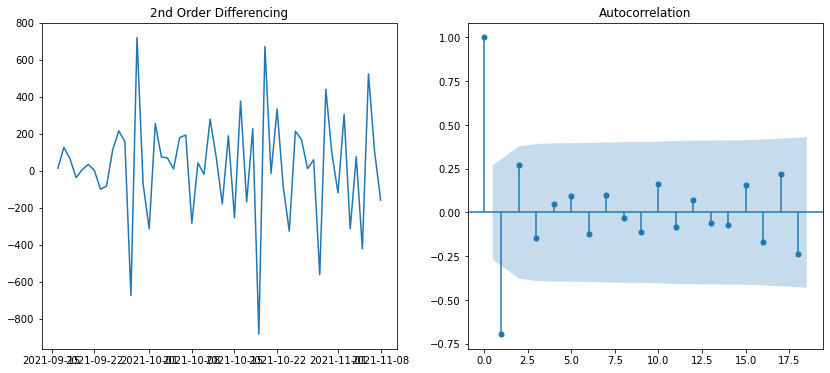

In [340]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.total_orders.diff())

ax2 = f.add_subplot(122)
plot_acf(df.total_orders.diff().diff().dropna(), ax=ax2)
plt.show()

In [341]:
# adfuller test
def test_stationarity(data):
    result = adfuller(data.dropna())
    print('p_value: ', result[1])
    
test_stationarity(df.total_orders)
test_stationarity(df.total_orders.diff())
test_stationarity(df.total_orders.diff().diff())

p_value:  0.77962082145804
p_value:  4.725369154449486e-11
p_value:  0.00014192940422658312


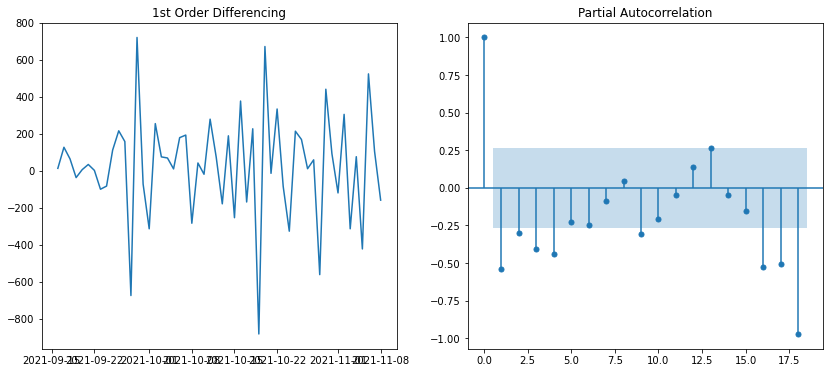

In [342]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.total_orders.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.total_orders.diff().dropna(), ax=ax2)
plt.show()

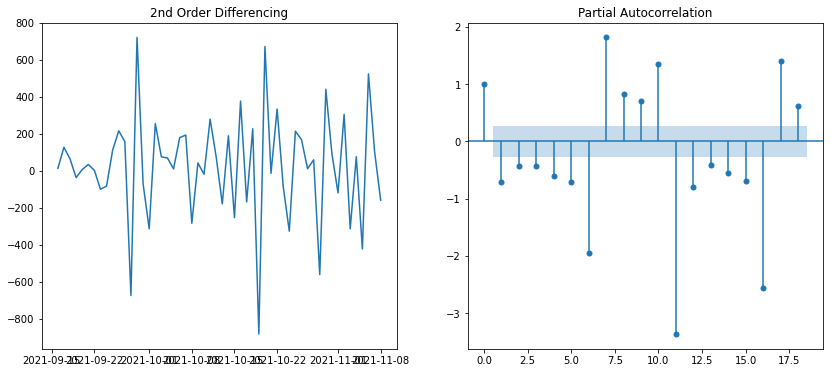

In [343]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.total_orders.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.total_orders.diff().diff().dropna(), ax=ax2)
plt.show()

In [344]:
# p = 1-2, d = 1-2, q = 1-2
# fitting
model = pm.auto_arima(df.total_orders, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=1, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=739.087, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=770.172, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=754.689, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=737.479, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=768.568, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=746.168, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.284 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   55
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -365.740
Date:                Wed, 23 Mar 2022   AIC                            737.479
Time:                        23:32:20   BIC                            743.446
Sample:                             0   HQIC                           739.781
                

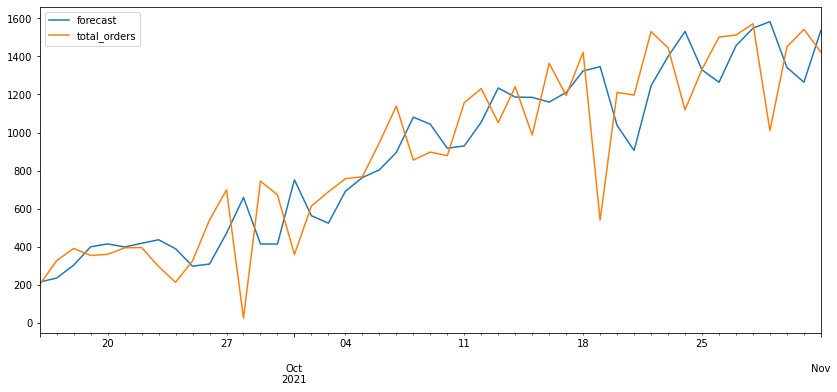

In [345]:
model_arima = ARIMA(df.total_orders[:48], order=(1,1,0))
model = model_arima.fit()

model.plot_predict(dynamic=False)
plt.show()

In [346]:
y_pred = pd.Series(model.forecast(7)[0], index=df.total_orders[48:].index)
y_true = df.total_orders[48:]

print(np.array(y_pred).astype(np.uint8))
print(np.array(y_true))

[246 234  26  43  76 101 130]
[1728 1414 1490 1067 1591 1696 1537]


In [347]:
n = np.array(df[:48]).shape[0]
d = np.abs(np.diff(np.array(df[:48].total_orders))).sum() / (n-1)
mase = (np.abs(y_true - y_pred).mean()) / d
mase

0.767905043365941

In [348]:
mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))  # MAPE
mape

0.12132140415268186